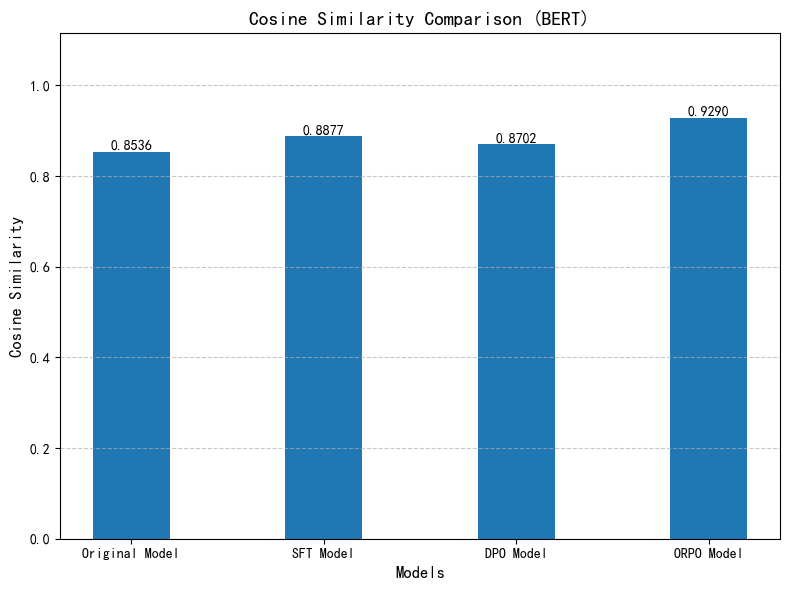

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv('origin_average_bert_cosine_similarity.csv')
df2 = pd.read_csv('SFT_average_bert_cosine_similarity.csv')
df3 = pd.read_csv('DPO_average_bert_cosine_similarity.csv')
df4 = pd.read_csv('ORPO_average_bert_cosine_similarity.csv')

score1 = df1['average_cosine_similarity'].tolist()[0]
score2 = df2['average_cosine_similarity'].tolist()[0]
score3 = df3['average_cosine_similarity'].tolist()[0]
score4 = df4['average_cosine_similarity'].tolist()[0]
# 设置中文字体（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 数据
models = ['Original Model', 'SFT Model', 'DPO Model', 'ORPO Model']  # 模型名称
bleu_scores = [score1, score2, score3, score4]  # 替换成你的实际BLEU分数

# 创建图表
plt.figure(figsize=(8, 6))

# 绘制柱状图
bars = plt.bar(models, bleu_scores, width=0.4)

# 设置标题和标签
plt.title('Cosine Similarity Comparison (BERT)', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Cosine Similarity', fontsize=12)

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# 设置y轴范围（可选，根据实际分数调整）
plt.ylim(0, max(bleu_scores) * 1.2)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

C:\Users\13686\AppData\Local\Temp\ipykernel_43032\4090584226.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, labels=['Original', 'SFT', 'DPO', 'ORPO'])


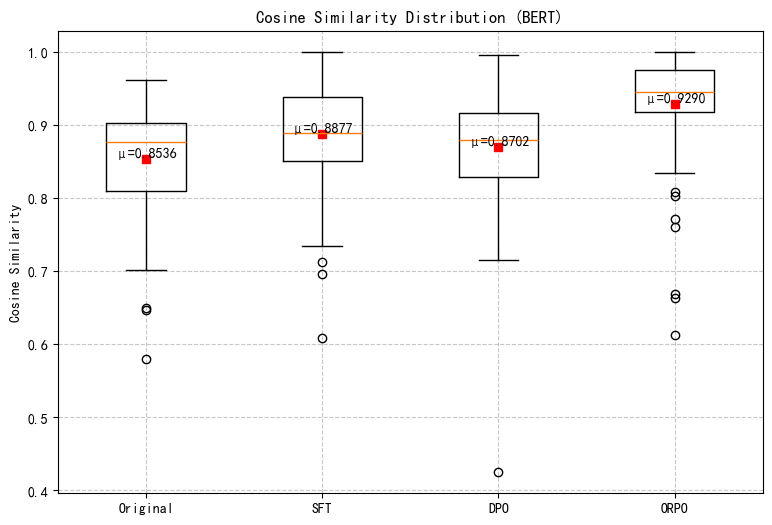

In [2]:
df1 = pd.read_csv('origin_detailed_bert_cosine_similarity.csv')
df2 = pd.read_csv('SFT_detailed_bert_cosine_similarity.csv')
df3 = pd.read_csv('DPO_detailed_bert_cosine_similarity.csv')
df4 = pd.read_csv('ORPO_detailed_bert_cosine_similarity.csv')
# 创建图表
plt.figure(figsize=(20, 6))

# 1. 箱线图对比
plt.subplot(1, 2, 1)
data = [df1['cosine_similarity'], df2['cosine_similarity'], df3['cosine_similarity'], df4['cosine_similarity']]
bp = plt.boxplot(data, labels=['Original', 'SFT', 'DPO', 'ORPO'])

# 添加均值点
means = [df1['cosine_similarity'].mean(), df2['cosine_similarity'].mean(), df3['cosine_similarity'].mean(), df4['cosine_similarity'].mean()]
plt.plot([1, 2, 3, 4], means, 'rs', label='Mean')

# 在图上标注均值
for i, mean in enumerate(means):
    plt.text(i+1, mean, f'μ={mean:.4f}', 
             horizontalalignment='center', 
             verticalalignment='bottom')

plt.title('Cosine Similarity Distribution (BERT)')
plt.ylabel('Cosine Similarity')
plt.grid(True, linestyle='--', alpha=0.7)

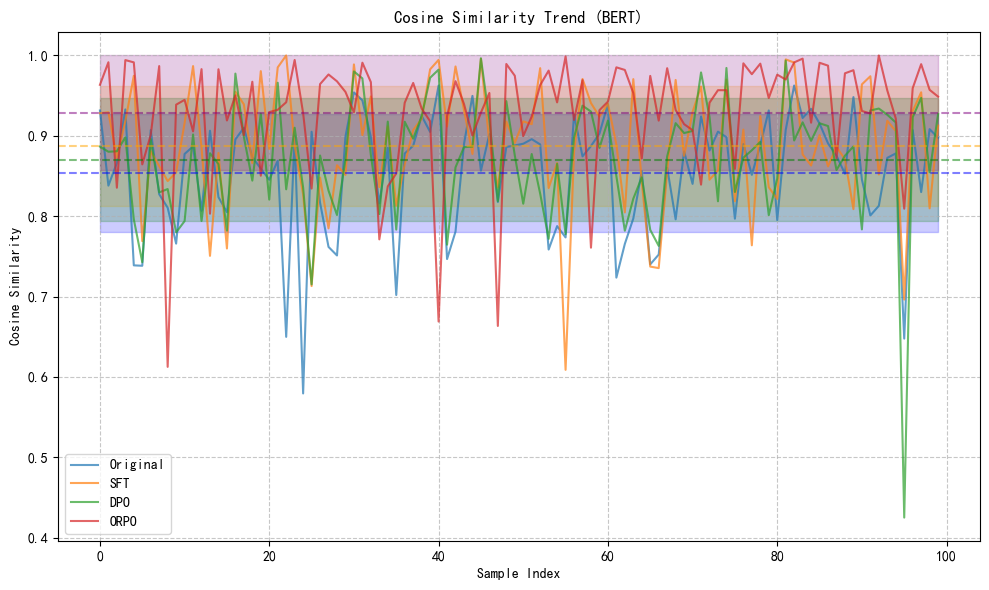

In [3]:
# 2. 折线图对比
# plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 6))
x = range(len(df1))
plt.plot(x, df1['cosine_similarity'], label='Original', alpha=0.7)
plt.plot(x, df2['cosine_similarity'], label='SFT', alpha=0.7)
plt.plot(x, df3['cosine_similarity'], label='DPO', alpha=0.7)
plt.plot(x, df4['cosine_similarity'], label='ORPO', alpha=0.7)
# 添加置信区间
def add_confidence_interval(data, color, alpha=0.2):
    mean = data.mean()
    std = data.std()
    plt.axhline(y=mean, color=color, linestyle='--', alpha=0.5)
    plt.fill_between(x, mean-std, mean+std, color=color, alpha=alpha)

add_confidence_interval(df1['cosine_similarity'], 'blue')
add_confidence_interval(df2['cosine_similarity'], 'orange')
add_confidence_interval(df3['cosine_similarity'], 'green')
add_confidence_interval(df4['cosine_similarity'], 'purple')
plt.title('Cosine Similarity Trend (BERT)')
plt.xlabel('Sample Index')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()
plt.show()
